## Read and filter out duplicated and bad objects.

In [18]:
#in the order that corresponds to the catalogues. 
g1s = [-.02,-.015,-.01,-.005,0.,.005,.01,.015,.02]

In [21]:
#this new LSST set of catalogues has g1 = .02 , g2 = 0.0 ; we will be using this one from now on. 
#this only excludes object that are duplicated and whose snr_grp are problematic.

main_catsLSST = []  
for key in ['Ffinal_fitsLSST1','Ffinal_fitsLSST2','Ffinal_fitsLSST3','Ffinal_fitsLSST4','Ffinal_fitsLSST5','Ffinal_fitsLSST6','Ffinal_fitsLSST7','Ffinal_fitsLSST8','Ffinal_fitsLSST9']:
    results = fits.open(files[key])
    main_catsLSST.append(not_bad(get_non_duplicated_cat(Table.read(results,hdu=1)))) #assume not many objects are duplicated/bad.
    print('reading {}'.format(key))

reading Ffinal_fitsLSST1
reading Ffinal_fitsLSST2
reading Ffinal_fitsLSST3
reading Ffinal_fitsLSST4
reading Ffinal_fitsLSST5
reading Ffinal_fitsLSST6
reading Ffinal_fitsLSST7
reading Ffinal_fitsLSST8
reading Ffinal_fitsLSST9


In [ ]:
import preamble

## Preamble

In [ ]:
# this new function plots both blending off and blending on bias on g1 shear. 
def plot_bias_bins_both(cat,bins,bin_param,yrange=None,xrange=None, xlabel = None, 
                  ylabel = None,title = None, xlogscale = False, ylogscale = False, scientific = False, draw_cut_lensing=False): 
    
    plt.rc('text', usetex = True)
    fig, ax = plt.subplots(figsize=(10,10))
    
    min_bin,max_bin = np.min(cat[bin_param]), np.max(cat[bin_param])
    print(f'min {bin_param}, max {bin_param}:', min_bin, max_bin)
    print('bins', bins )
    
    #blending off 
    small_cats, x, y_isos,errs_x1, errs_x2 = binning_helper(bins, cat, bin_param, 'bias_g1')
    x_errs = [errs_x1,errs_x2]     # put the errors into a list 
    y_errs_iso = errs_param_boot(small_cats,'bias_g1', np.median,N=1000)     #get y errs, this are the error in the median shear bias calculated 
    
    
    #blending on. 
    _, _, y_grps,_, _ = binning_helper(bins, cat, bin_param, 'bias_g1_grp')
    y_errs_grp = errs_param_boot(small_cats,'bias_g1_grp', np.median,N=1000)     
    
    print('x_errs')
    print(x_errs)
    print()
    print('x')
    print(x)
    print()
    print('y_errs for bias_g1')
    print(y_errs_iso)
    print() 
    print('y for bias_g1')
    print(y_isos)
    print()
    print('y_errs for bias_g1_grp')
    print(y_errs_grp)
    print() 
    print('y for bias_g1_grp')
    print(y_grps)
    print() 
    
    #deal with negative points per pat's slack comment. 
    for i,(y_iso,y_grp) in enumerate(zip(y_isos, y_grps)): 
        if y_iso < 0: 
            print('negative iso')
            y_errs_iso[i] = y_errs_iso[i] + y_isos[i] - 0.8e-7 
            y_isos[i] = 0.8e-7  #set point somewhere below 10^{-7} but not negative. 
            
        if y_grp < 0: 
            print('negative grp')
            y_errs_grp[i] = y_errs_grp[i] + y_grps[i] - 0.8e-7 
            y_grps[i] = 0.8e-7  #set point somewhere below 10^{-7} but not negative.
            
            
    #mark that we have a cut at snr = 6 
    if draw_cut_lensing:
        ax.axvline(x=6, color='g')
            
    
    
    
    #x_errs[1][-1] = 29.94817734 #make the last one symmetric to avoid running off plot
    
    ########################################## formating ##########################################
        
    #ax.set_yscale('log')
    if xlogscale: 
        ax.set_xscale('log')
    
    if ylogscale: 
        ax.set_yscale('log')
    
    if yrange: 
        ax.set_ylim(yrange)
    if xrange: 
        ax.set_xlim(xrange)
        
    ax.set_title(title, size =28)
    ax.set_xlabel(xlabel, size = 24)
    ax.set_ylabel(ylabel, size = 24)
        
    
    ax.tick_params(axis='both', which='major', labelsize=20)

    #scientfic notation. 
    if scientific == True: 
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        ax.yaxis.offsetText.set_fontsize(15)
        
    elif scientific == 'yes': 
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        ax.yaxis.offsetText.set_fontsize(1)
    
    ax.axhline(y=0.0, color='g', linestyle=':')    
    
    ########################################## plotting ##########################################

    ax.errorbar(x,y_isos,xerr=x_errs,yerr=y_errs_iso,fmt='o',capsize=5,ecolor='r',color = 'r', label = '\\rm Blending off')
    ax.errorbar(x,y_grps,xerr=x_errs,yerr=y_errs_grp,fmt='o',capsize=5,ecolor='b',color = 'b', label = '\\rm Blending on')
    
    ax.legend(prop=dict(size=22))
 

## Plots 

In [ ]:
# this new function plots both blending off and blending on bias on g1 shear. 
def plot_bias_bins(cat,bins,bin_param,bias_type, yrange=None,xrange=None, xlabel = None, 
                  ylabel = None, title = None, xlogscale = False, ylogscale = False,  scientific = False, ): 
    
    plt.rc('text', usetex = True)
    fig, ax = plt.subplots(figsize=(10,10))
    
    min_bin,max_bin = np.min(cat[bin_param]), np.max(cat[bin_param])
    print(f'min {bin_param}, max {bin_param}:', min_bin, max_bin)
    print('bins', bins )
    
    #blending off 
    small_cats, x, y, errs_x1, errs_x2 = binning_helper(bins, cat, bin_param, bias_type)
    x_errs = [errs_x1,errs_x2]     # put the errors into a list 
    y_errs = errs_param_boot(small_cats, bias_type, np.median,N=1000)     #get y errs, this are the error in the median shear bias calculated 
    
    
    
    print('x_errs')
    print(x_errs)
    print()
    print('x')
    print(x)
    print()
    print(f'y_errs for {bias_type}')
    print(y_errs)
    print() 
    print(f'y for {bias_type}')
    print(y)
 
    
    
    
    #x_errs[1][-1] = 29.94817734 #make the last one symmetric to avoid running off plot
    
    ########################################## formating ##########################################
        
    #ax.set_yscale('log')
    if xlogscale: 
        ax.set_xscale('log')
    
    if ylogscale: 
        ax.set_yscale('log')
    
    if yrange: 
        ax.set_ylim(yrange)
    if xrange: 
        ax.set_xlim(xrange)
        
    ax.set_title(title, size =28)
    ax.set_xlabel(xlabel, size = 24)
    ax.set_ylabel(ylabel, size = 24)
        
    
    ax.tick_params(axis='both', which='major', labelsize=20)

    #scientfic notation. 
    if scientific == True: 
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        ax.yaxis.offsetText.set_fontsize(15)
        
    elif scientific == 'yes': 
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        ax.yaxis.offsetText.set_fontsize(1)
    
    ax.axhline(y=0.0, color='g', linestyle=':')    
    
    ########################################## plotting ##########################################

    ax.errorbar(x,y,xerr=x_errs,yerr=y_errs,fmt='o',capsize=5,ecolor='r',color = 'b')

In [ ]:
def binning_helper(bins, cat, bin_param, bias_type): 
    small_cats = []
    x = [] 
    y = [] 
    errs_x1 = [] 
    errs_x2 = []
    for i in range(len(bins)-1):
        small_cat = down_cut(up_cut(cat,bin_param,bins[i]),bin_param,bins[i+1])

        #if the cutted catalogue turns out to be empty, ignore it. 
        if len(small_cat) == 0: 
            continue 


        small_cats.append(small_cat) 

        median_bin_value = np.median(small_cat[bin_param])
        small_bias = np.median(small_cat[bias_type])

        #want 'error bars on x' showing the extent of the bin widths
        errs_x1.append(np.absolute(bins[i] - median_bin_value))
        errs_x2.append(np.absolute(bins[i+1] - median_bin_value))

        #print the error for this param, we want all of them to be the same 

        #err_y.append(np.std(abs_cut(small_cat,param,10)[param]))
        x.append(median_bin_value)
        y.append(small_bias)
    
    return small_cats, np.array(x), np.array(y), np.array(errs_x1), np.array(errs_x2) 

### All galaxies,  snr_grpf, b(g1) blending off 

In [148]:
cat = main_catsLSST[8]
#snrs = [2**i for i in range(0,8)]

In [149]:
snrs = [1.5,3.0,6.0,12,24,48,96,192] 

In [150]:
snrs.append(np.max(cat['snr_grpf']))

xlabel= "$\\nu_{\\rm{grpf}}$"
ylabel= "\\rm{Median shear bias}"
title = '\\rm{All galaxies}' 


xrange = [1, 192]
yrange = [1e-7,1e-1]

In [151]:
# plot_bias_bins(cat,snrs, 'snr_grpf', 'bias_g1', yrange=yrange, xrange=xrange, 
#               xlabel = xlabel , ylabel = ylabel, 
#               title = title, xlogscale = True, ylogscale = True, scientific = True)

min snr_grpf, max snr_grpf: 2.09402e-06 23278.7
bins [1.5, 3.0, 6.0, 12, 24, 48, 96, 192, 23278.695]
just to check that symmetry is respected print both percentiles: [ 0.00060537  0.00050979]
just to check that symmetry is respected print both percentiles: [ 0.00014647  0.00017954]
just to check that symmetry is respected print both percentiles: [  3.54619557e-05   4.46637277e-05]
just to check that symmetry is respected print both percentiles: [  9.82759229e-06   1.07846834e-05]
just to check that symmetry is respected print both percentiles: [  3.78618097e-06   3.12539305e-06]
just to check that symmetry is respected print both percentiles: [  1.04920605e-06   8.06786047e-07]
just to check that symmetry is respected print both percentiles: [  2.26974777e-07   2.69612751e-07]
just to check that symmetry is respected print both percentiles: [  1.50040798e-08   1.48360151e-08]
just to check that symmetry is respected print both percentiles: [ 0.00104671  0.00089888]
just to check that s

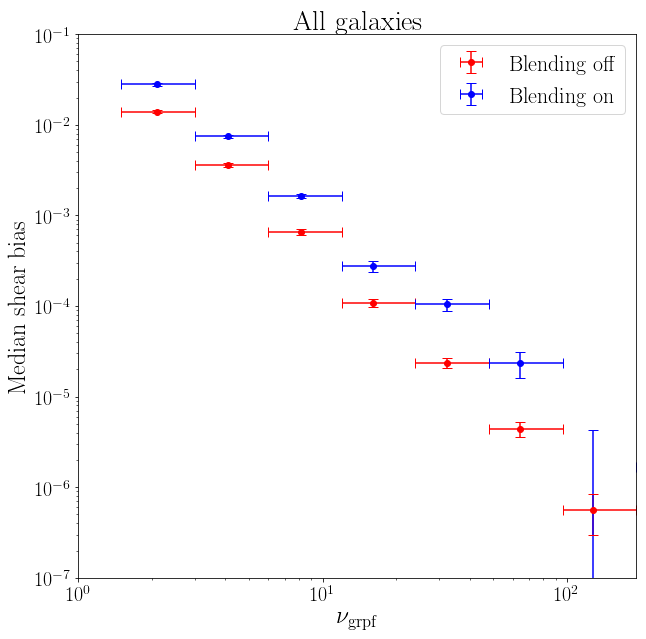

In [152]:
plot_bias_bins_both(cat,snrs, 'snr_grpf', yrange=yrange, xrange=xrange, 
              xlabel = xlabel , ylabel = ylabel, 
              title = title, xlogscale = True, ylogscale = True, scientific = False, draw_cut_lensing=False)

### SNR bins for cut only on size. 

In [133]:
size_cut_cat = up_cut(main_catsLSST[8], 'sigma_m', 0.2)  
#snrs = [2**i for i in range(0,8)]

In [134]:
snrs = [1.5,3.0,6.0,12,24,48,96,192] 

snrs.append(np.max(cat['snr_grpf']))

In [135]:
xlabel= "$\\nu_{\\rm{grpf}}$"
ylabel= "\\rm{Median shear bias}"
title = '\\rm{Galaxies with } $\\sigma_{-} > 0.2$' 

xrange = [1, 192]
yrange = [1e-7,1e-1]

min snr_grpf, max snr_grpf: 2.09402e-06 23278.7
bins [1.5, 3.0, 6.0, 12, 24, 48, 96, 192, 23278.695]
just to check that symmetry is respected print both percentiles: [ 0.0002806   0.00027136]
just to check that symmetry is respected print both percentiles: [  8.10226053e-05   9.94638540e-05]
just to check that symmetry is respected print both percentiles: [  2.65877461e-05   2.54644547e-05]
just to check that symmetry is respected print both percentiles: [  8.11887730e-06   7.43276178e-06]
just to check that symmetry is respected print both percentiles: [  1.78013215e-06   3.34261313e-06]
just to check that symmetry is respected print both percentiles: [  9.12160149e-07   7.93441013e-07]
just to check that symmetry is respected print both percentiles: [  2.32197863e-07   2.27409600e-07]
just to check that symmetry is respected print both percentiles: [  1.48016532e-08   1.53660409e-08]
just to check that symmetry is respected print both percentiles: [ 0.00075502  0.00058043]
just to ch

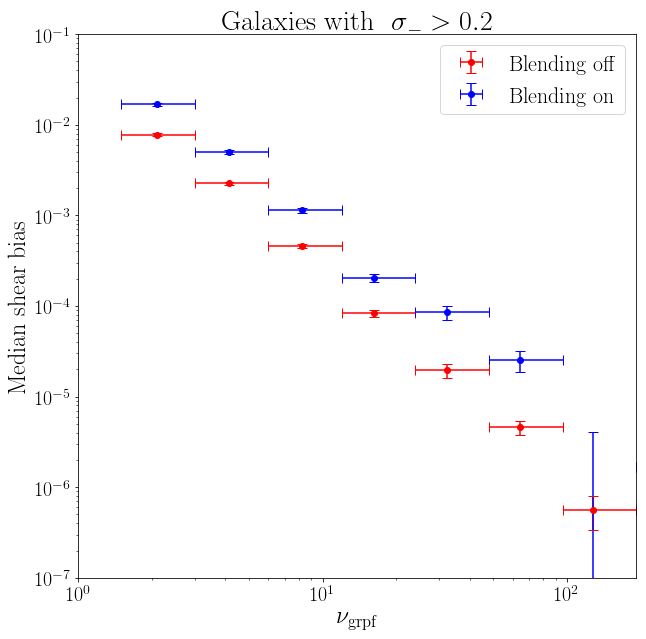

In [136]:

# plot_bias_bins(cat,snrs, 'snr_grpf', 'bias_g1', yrange=yrange, xrange=xrange, 
#               xlabel = xlabel , ylabel = ylabel, 
#               title = title, xlogscale = True, ylogscale = True, scientific = True)

plot_bias_bins_both(size_cut_cat,snrs, 'snr_grpf', yrange=yrange, xrange=xrange, 
              xlabel = xlabel , ylabel = ylabel, 
              title = title, xlogscale = True, ylogscale = True, scientific = False, draw_cut_lensing=False)

### All galaxies,  purity, b(g1) blending off 

In [222]:
cat = main_catsLSST[8]

puritys = np.linspace(0, 1. , 6 )

xlabel= "\\rm{purity}"
ylabel= "\\rm{Median shear bias$\\; [10^{-2}]$"
title = '\\rm{All galaxies}' 


xrange = (0,1.01 )
yrange = [-1.7e-3,.125e-3]

min purity, max purity: 4.45327e-05 1.0
bins [ 0.   0.2  0.4  0.6  0.8  1. ]
just to check that symmetry is respected print both percentiles: [ 0.00123717  0.00139597]
just to check that symmetry is respected print both percentiles: [ 0.00079138  0.00088536]
just to check that symmetry is respected print both percentiles: [ 0.00053984  0.00050361]
just to check that symmetry is respected print both percentiles: [ 0.00024854  0.00025661]
just to check that symmetry is respected print both percentiles: [  1.14900339e-05   1.16910099e-05]
just to check that symmetry is respected print both percentiles: [ 0.00470954  0.0059257 ]
just to check that symmetry is respected print both percentiles: [ 0.00254858  0.00291949]
just to check that symmetry is respected print both percentiles: [ 0.00165589  0.00146593]
just to check that symmetry is respected print both percentiles: [ 0.00062135  0.00060794]
just to check that symmetry is respected print both percentiles: [  2.54894188e-05   2.4407687

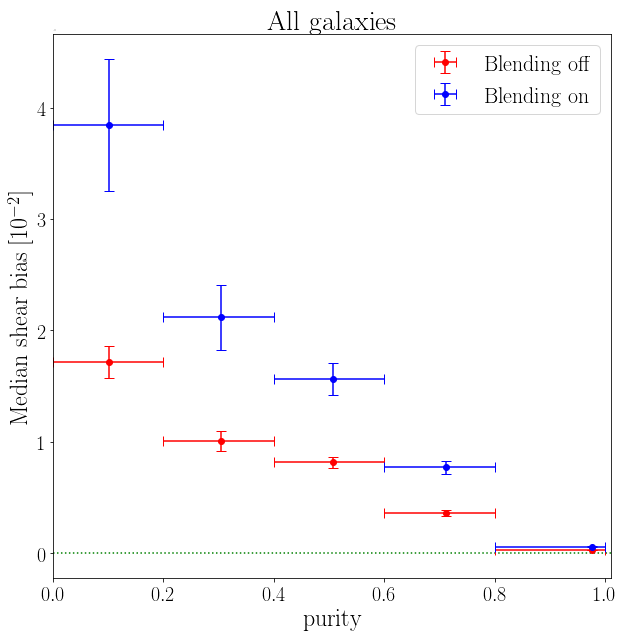

In [223]:
plot_bias_bins_both(cat,puritys, 'purity', yrange=None, xrange=xrange, 
              xlabel = xlabel , ylabel = ylabel, 
              title = title, xlogscale = False, ylogscale = False, scientific = 'yes')